30782 6.313105794805535 8.66354


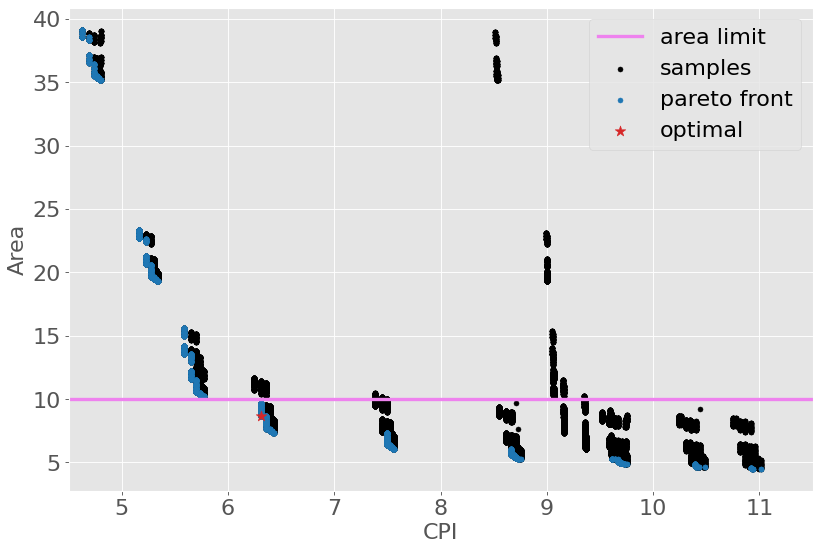

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
NUM = 1
ITER = 1000000000000000000000

plt.figure(figsize=(12,8), dpi=80)
def load(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    counter=0
    for line in sourceInLine:
        if counter == ITER:
            break
        data_temp=float(line)
        data.append(data_temp)
        counter+=1
    f.close()
    return data

def load_max(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    best=0
    counter=0
    for line in sourceInLine:
        if counter == ITER:
            break
        data_temp=float(line)
        if data_temp>best:
            best=data_temp
        data.append(best)
        counter+=1
    f.close()
    return data, best

def max_constraint(data, constrained_data, threshold):
    best=float('inf')
    constrained_data_min=float('inf')
    for idx, (x, y) in enumerate(zip(data, constrained_data)):
        if y <= threshold:
            if x < best:
                best = x
                idx_max = idx
                constrained_data_min = y
            if x == best and y < constrained_data_min:
                idx_max = idx
                constrained_data_min = y
    return idx_max, best, constrained_data_min

def pareto_efficient(x, y):
    # x, y are lists
    pts = np.stack((np.array(x)*-1, np.array(y)*-1), axis=1)
    #'returns Pareto efficient row subset of pts'
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    return pts
###################################################################################################################
#for BO
###################################################################################################################
DIRECTORY = os.path.join(os.getcwd(), '/rshome/hanwei.fan/WorkSpace/FNN_DSE/traverse_logs/full/')

cpi = load(os.path.join(DIRECTORY, 'cpi.txt'))
area = load(os.path.join(DIRECTORY, 'area.txt'))
best_epoch, best, min_area = max_constraint(cpi, area, 10)
print(best_epoch, best, min_area)
pf = pareto_efficient(cpi, area)
_pf = np.transpose(pf)
plt.scatter(cpi, area, s=20, c='k', marker='o', label='samples')
plt.scatter(_pf[0]*-1, _pf[1]*-1, s=20, c='#1f77b4', marker='o', label='pareto front')
plt.scatter(best, min_area, s=100, c='#d62728', marker='*', label='optimal')
plt.plot([4.5,12], [10,10], color='violet', lw=3, label='area limit')

###################################################################################################################
#plot
###################################################################################################################
plt.ylabel('Area',fontsize=20)
plt.xlabel('CPI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(4.5,11.5)
plt.legend(fontsize=20,loc='upper right')
plt.style.use('ggplot')
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(8,integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(8,integer=True))
# plt.savefig(f'./expFuzzy_1.pdf',bbox_inches='tight',dpi=80,pad_inches=0.0)#保存文件在指定文件夹下很方便
plt.show()
plt.close()

30782 6.313105794805535 8.66354


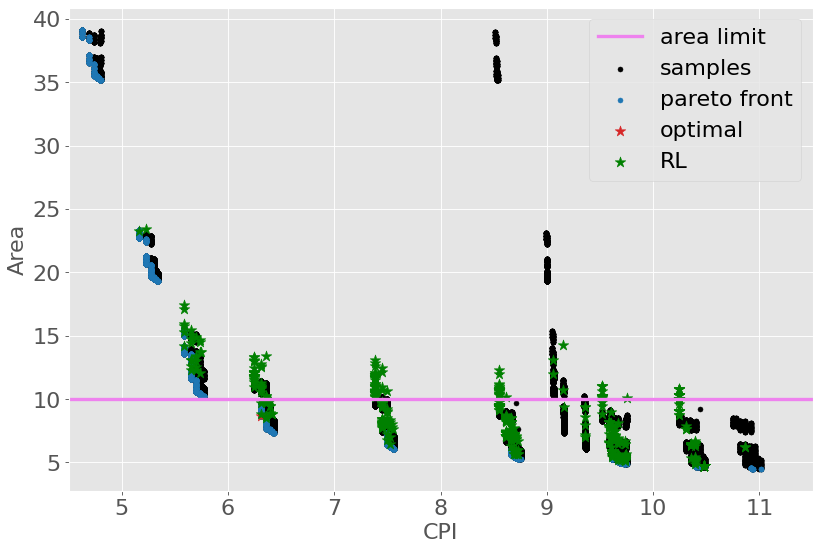

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
NUM = 1
ITER = 1000000000000000000000

plt.figure(figsize=(12,8), dpi=80)
def load(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    counter=0
    for line in sourceInLine:
        if counter == ITER:
            break
        data_temp=float(line)
        data.append(data_temp)
        counter+=1
    f.close()
    return data

def load_max(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    best=0
    counter=0
    for line in sourceInLine:
        if counter == ITER:
            break
        data_temp=float(line)
        if data_temp>best:
            best=data_temp
        data.append(best)
        counter+=1
    f.close()
    return data, best

def max_constraint(data, constrained_data, threshold):
    best=float('inf')
    constrained_data_min=float('inf')
    for idx, (x, y) in enumerate(zip(data, constrained_data)):
        if y <= threshold:
            if x < best:
                best = x
                idx_max = idx
                constrained_data_min = y
            if x == best and y < constrained_data_min:
                idx_max = idx
                constrained_data_min = y
    return idx_max, best, constrained_data_min

def pareto_efficient(x, y):
    # x, y are lists
    pts = np.stack((np.array(x)*-1, np.array(y)*-1), axis=1)
    #'returns Pareto efficient row subset of pts'
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    return pts
###################################################################################################################
#for BO
###################################################################################################################
DIRECTORY = os.path.join(os.getcwd(), '/rshome/hanwei.fan/WorkSpace/FNN_DSE/traverse_logs/full/')
samples = load('/rshome/hanwei.fan/WorkSpace/FNN_DSE/RL_logs/episode/6/loss.txt')
samples_area = load('/rshome/hanwei.fan/WorkSpace/FNN_DSE/RL_logs/episode/6/area.txt')
cpi = load(os.path.join(DIRECTORY, 'cpi.txt'))
area = load(os.path.join(DIRECTORY, 'area.txt'))
best_epoch, best, min_area = max_constraint(cpi, area, 10)
print(best_epoch, best, min_area)
pf = pareto_efficient(cpi, area)
_pf = np.transpose(pf)
plt.scatter(cpi, area, s=20, c='k', marker='o', label='samples')
plt.scatter(_pf[0]*-1, _pf[1]*-1, s=20, c='#1f77b4', marker='o', label='pareto front')
plt.scatter(best, min_area, s=100, c='#d62728', marker='*', label='optimal')
plt.plot([4.5,12], [10,10], color='violet', lw=3, label='area limit')
plt.scatter(samples, samples_area, s=100, c='g', marker='*', label='RL')
###################################################################################################################
#plot
###################################################################################################################
plt.ylabel('Area',fontsize=20)
plt.xlabel('CPI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(4.5,11.5)
plt.legend(fontsize=20,loc='upper right')
plt.style.use('ggplot')
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(8,integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(8,integer=True))
# plt.savefig(f'./expFuzzy_1.pdf',bbox_inches='tight',dpi=80,pad_inches=0.0)#保存文件在指定文件夹下很方便
plt.show()
plt.close()

In [2]:
import os
NUM = 1

def load(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    for line in sourceInLine:
        data_temp=float(line)
        data.append(data_temp)
    f.close()
    return data

def best_cpi(cpi, area, threshold):
    best=float('inf')
    best_area=float('inf')
    for idx, (x, y) in enumerate(zip(cpi, area)):
        if y <= threshold:
            if x < best:
                best = x
                idx_max = idx
                best_area = y
            if x == best and y < best_area:
                idx_max = idx
                best_area = y
    return idx_max, best, best_area

DIRECTORY = os.path.join(os.getcwd(), '/rshome/hanwei.fan/WorkSpace/FNN_DSE/dataset/mcpat/full')

cpi = load(os.path.join(DIRECTORY, 'cpi.txt'))
area = load(os.path.join(DIRECTORY, 'area.txt'))
best_epoch, best, min_area = best_cpi(cpi, area, 10)
print(best_epoch+1, best, min_area)

30782 6.313105794805535 8.66354
